# Proyecto - Desarrollo

## Detección de la ocupación de una oficina a partir de datos de luz, temperatura, humedad y concentración de CO2, por medio del uso de modelos estadísticos lineales.

Alejandro Mantilla - 201711304

Ximena Palacio - 201730995 

In [1]:
library(readr)
datos <- read_csv("Archivos/datos_entrenamiento.csv",
                  show_col_types = FALSE)

datos$date <- lubridate::round_date(datos$date,
           unit = "minute")

datos$id <- NULL

head(datos)

date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-02-11 14:48:00,21.7600,31.13333,437.3333,1029.667,0.005021011,1
2015-02-11 14:49:00,21.7900,31.00000,437.3333,1000.000,0.005008581,1
2015-02-11 14:50:00,21.7675,31.12250,434.0000,1003.750,0.005021569,1
2015-02-11 14:51:00,21.7675,31.12250,439.0000,1009.500,0.005021569,1
2015-02-11 14:52:00,21.7900,31.13333,437.3333,1005.667,0.005030298,1
2015-02-11 14:53:00,21.7600,31.26000,437.3333,1014.333,0.005041605,1


In [2]:
datos$date <- lubridate::round_date(datos$date,
                                    unit = "minute")

datos$DayOfWeek <- lubridate::wday(datos$date, week_start=1)
datos$WorkingTime <- as.numeric(lubridate::wday(datos$date, week_start=1) <= 5
                               & lubridate::hour(datos$date) >= 8
                               & lubridate::hour(datos$date) <= 18)


datos$HourOfDay <- lubridate::hour(datos$date)
datos$MinuteOfHour <- lubridate::minute(datos$date)


In [3]:
dates <- datos$date
datos$date <- NULL

In [4]:
head(datos)

Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,DayOfWeek,WorkingTime,HourOfDay,MinuteOfHour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
21.7600,31.13333,437.3333,1029.667,0.005021011,1,3,1,14,48
21.7900,31.00000,437.3333,1000.000,0.005008581,1,3,1,14,49
21.7675,31.12250,434.0000,1003.750,0.005021569,1,3,1,14,50
21.7675,31.12250,439.0000,1009.500,0.005021569,1,3,1,14,51
21.7900,31.13333,437.3333,1005.667,0.005030298,1,3,1,14,52
21.7600,31.26000,437.3333,1014.333,0.005041605,1,3,1,14,53


In [ ]:
dev.new(width=5, height=4)

pairs(datos,
      col = "#B04C7A",
     )

In [5]:
summary(datos)

  Temperature       Humidity         Light             CO2        
 Min.   :19.50   Min.   :21.86   Min.   :   0.0   Min.   : 484.7  
 1st Qu.:20.29   1st Qu.:26.64   1st Qu.:   0.0   1st Qu.: 542.3  
 Median :20.79   Median :30.20   Median :   0.0   Median : 639.0  
 Mean   :21.00   Mean   :29.89   Mean   : 123.1   Mean   : 753.2  
 3rd Qu.:21.53   3rd Qu.:32.70   3rd Qu.: 208.2   3rd Qu.: 831.1  
 Max.   :24.39   Max.   :39.50   Max.   :1581.0   Max.   :2076.5  
 HumidityRatio        Occupancy        DayOfWeek      WorkingTime    
 Min.   :0.003275   Min.   :0.0000   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.004196   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:0.0000  
 Median :0.004593   Median :0.0000   Median :4.000   Median :0.0000  
 Mean   :0.004589   Mean   :0.2101   Mean   :4.034   Mean   :0.3048  
 3rd Qu.:0.004998   3rd Qu.:0.0000   3rd Qu.:6.000   3rd Qu.:1.0000  
 Max.   :0.005769   Max.   :1.0000   Max.   :7.000   Max.   :1.0000  
   HourOfDay     MinuteOfHour  
 Min.   :

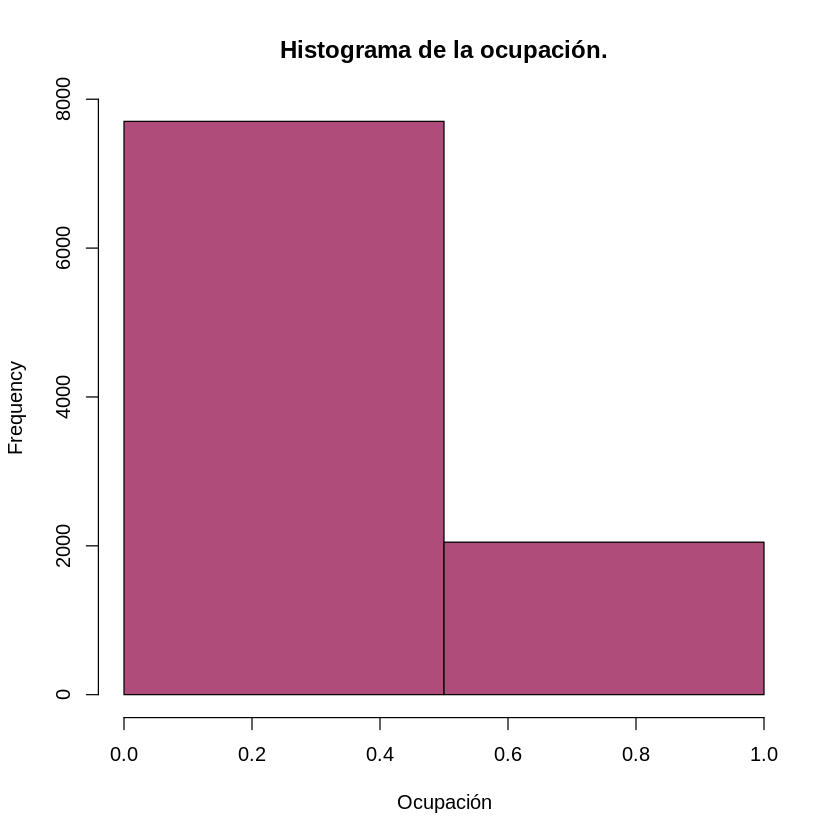

In [6]:
hist(datos$Occupancy, breaks = c(0, 0.5, 1 ),
     col = "#B04C7A",
     main = "Histograma de la ocupación.",
     xlab = "Ocupación")

In [7]:
datos_1 <- datos[datos$Occupancy == 1, ]
datos_0 <- datos[datos$Occupancy == 0, ]

indices_1 <- sample(nrow(datos_1),
                    size = nrow(datos_0) - nrow(datos_1),
                    replace = TRUE)

datos_balanceados <- rbind(datos,
                           datos_1[indices_1, ])

datos <- datos_balanceados

In [10]:
dim(datos)

[1] 15406    10

In [ ]:
hist(datos_balanceados$Occupancy, breaks = c(0, 0.5, 1 ),
     col = "#B04C7A",
     main = "Histograma de la ocupación.",
     xlab = "Ocupación")

In [ ]:
boxplot(datos$DayOfWeek ~ datos$Occupancy,
        ylab = "Día de la semana",
        xlab = "Ocupación",
        col = "#E79C82")

In [ ]:
plot(datos$DayOfWeek,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Día de la semana",
     col = "#E79C82")

In [ ]:
boxplot(datos$HourOfDay ~ datos$Occupancy,
        ylab = "Hora del día",
        xlab = "Ocupación",
        col = "#E79C82")

In [ ]:
boxplot(datos$MinuteOfHour ~ datos$Occupancy,
        ylab = "Minuto de la hora",
        xlab = "Ocupación",
        col = "#E79C82")

In [ ]:
plot(datos$WorkingTime,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Horario laboral",
     col = "#E79C82")

In [ ]:
head(datos)

In [ ]:
boxplot(datos$HumidityRatio ~ as.factor(datos$WorkingDay) + datos$Occupancy,
        xlab = "Ocupación",
        col = rainbow(2, s = 0.5))

In [ ]:
hist(datos$DayOfWeek)

In [ ]:
hist(datos$Temperature,
     main = "Histograma de temperaturas",
     xlab = "Temperatura",
     col = "#D86036")

In [ ]:
boxplot(datos$Temperature ~ datos$Occupancy,
        ylab = "Temperatura",
        xlab = "Ocupación",
        col = "#D86036")

In [ ]:
plot(datos$Temperature,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Temperatura",
     col = "#D86036")

In [ ]:
hist(datos$Humidity,
     main = "Histograma de humedad",
     xlab = "Humedad",
     col = "#CF2D4C")

In [ ]:
boxplot(datos$Humidity ~ datos$Occupancy,
        ylab = "Humedad",
        xlab = "Ocupación",
        col = "#CF2D4C")

In [ ]:
plot(datos$Humidity,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Humedad",
     col = "#CF2D4C")

In [ ]:
hist(datos$Light,
     main = "Histograma de intensidad de luz",
     xlab = "Intensidad de luz",
     col = "#B04C7A")

In [ ]:
boxplot(datos$Light ~ datos$Occupancy,
        ylab = "Intensidad de luz",
        xlab = "Ocupación",
        col = "#B04C7A")

In [ ]:
plot(datos$Light,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Intensidad de luz",
     col = "#B04C7A")

In [ ]:
hist(datos$CO2,
     main = "Histograma de concentración de CO2",
     xlab = "Concentración de CO2",
     col = "#623A6C")

In [ ]:
boxplot(datos$CO2 ~ datos$Occupancy,
        ylab = "CO2",
        xlab = "Concentración de CO2",
        col = "#623A6C")

In [ ]:
plot(datos$CO2,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Concentración de CO2",
     col = "#623A6C")

In [ ]:
hist(datos$HumidityRatio,
     main = "Histograma de tasa de humedad.",
     xlab = "Tasa de humedad",
     col = "#545E66")

In [ ]:
boxplot(datos$HumidityRatio ~ datos$Occupancy,
        ylab = "Tasa de humedad",
        xlab = "Tasa de humedad",
        col = "#545E66")

In [ ]:
plot(datos$HumidityRatio,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Tasa de humedad",
     col = "#545E66")

In [11]:
datos_trans <- as.data.frame(model.matrix(Occupancy ~ . - HumidityRatio - 1,
                                          data = datos))

#+ (HourOfDay) * (Temperature + Humidity)
#+ (DayOfWeek) * (Temperature)
#+ (WorkingTime) * (Temperature + Humidity + Light + CO2)

datos_trans$Occupancy <- datos$Occupancy
head(datos_trans)

,Temperature,Humidity,Light,CO2,DayOfWeek,WorkingTime,HourOfDay,MinuteOfHour,Occupancy
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21.7600,31.13333,437.3333,1029.667,3,1,14,48,1
2,21.7900,31.00000,437.3333,1000.000,3,1,14,49,1
3,21.7675,31.12250,434.0000,1003.750,3,1,14,50,1
4,21.7675,31.12250,439.0000,1009.500,3,1,14,51,1
5,21.7900,31.13333,437.3333,1005.667,3,1,14,52,1
6,21.7600,31.26000,437.3333,1014.333,3,1,14,53,1


In [12]:
modelo_comp <- glm(Occupancy ~ ., data = datos_trans, family = "binomial")
sm <- summary(modelo_comp)
sm


Call:
glm(formula = Occupancy ~ ., family = "binomial", data = datos_trans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.0611   0.0000   0.0000   0.0937   3.2479  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.279e+01  5.189e+02  -0.025 0.980344    
Temperature  -8.684e-01  1.388e-01  -6.255 3.97e-10 ***
Humidity      1.765e-01  5.387e-02   3.276 0.001053 ** 
Light         2.063e-02  6.711e-04  30.747  < 2e-16 ***
CO2           4.949e-05  5.877e-04   0.084 0.932881    
DayOfWeek    -2.582e-01  1.086e-01  -2.377 0.017446 *  
WorkingTime   2.044e+01  5.189e+02   0.039 0.968582    
HourOfDay     1.920e-01  5.003e-02   3.837 0.000124 ***
MinuteOfHour -3.991e-03  6.322e-03  -0.631 0.527818    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21357.25  on 15405  degrees of freedom
Residual deviance:   827.91  on 15397  degrees of 

In [13]:
car::vif(modelo_comp)

Temperature     Humidity        Light          CO2    DayOfWeek  WorkingTime 
    1.929519     3.271149     1.237664     2.146131     1.964173     1.000000 
   HourOfDay MinuteOfHour 
    2.580049     1.034409

In [21]:
modelo_comp_red <- glm(Occupancy ~ . - CO2 - WorkingTime - MinuteOfHour, data = datos_trans, family = "binomial")
sm <- summary(modelo_comp_red)
sm

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Occupancy ~ . - CO2 - WorkingTime - MinuteOfHour, 
    family = "binomial", data = datos_trans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3768  -0.0340  -0.0022   0.0686   3.8481  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.0713498  2.7504148  -1.480  0.13880    
Temperature -0.2614219  0.1072073  -2.438  0.01475 *  
Humidity     0.1010733  0.0362096   2.791  0.00525 ** 
Light        0.0264527  0.0007318  36.149  < 2e-16 ***
DayOfWeek   -0.8310600  0.0679529 -12.230  < 2e-16 ***
HourOfDay    0.1708129  0.0303633   5.626 1.85e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21357.3  on 15405  degrees of freedom
Residual deviance:  1000.7  on 15400  degrees of freedom
AIC: 1012.7

Number of Fisher Scoring iterations: 9


In [16]:
car::vif(modelo_comp_red)

Temperature    Humidity       Light   DayOfWeek   HourOfDay 
   1.567131    1.816812    1.489019    1.377973    1.887802

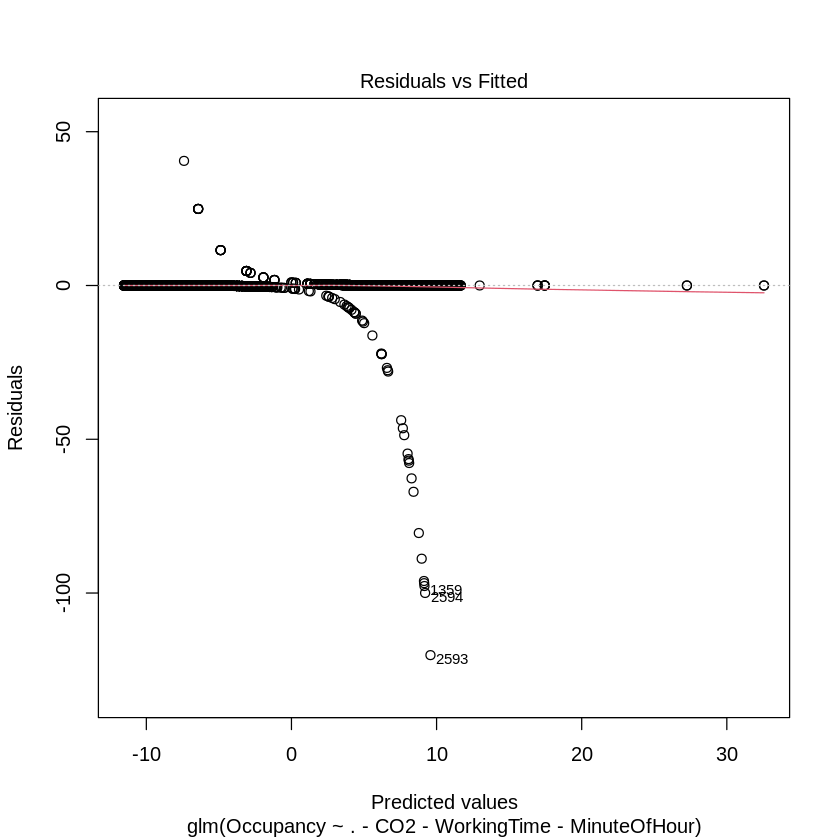

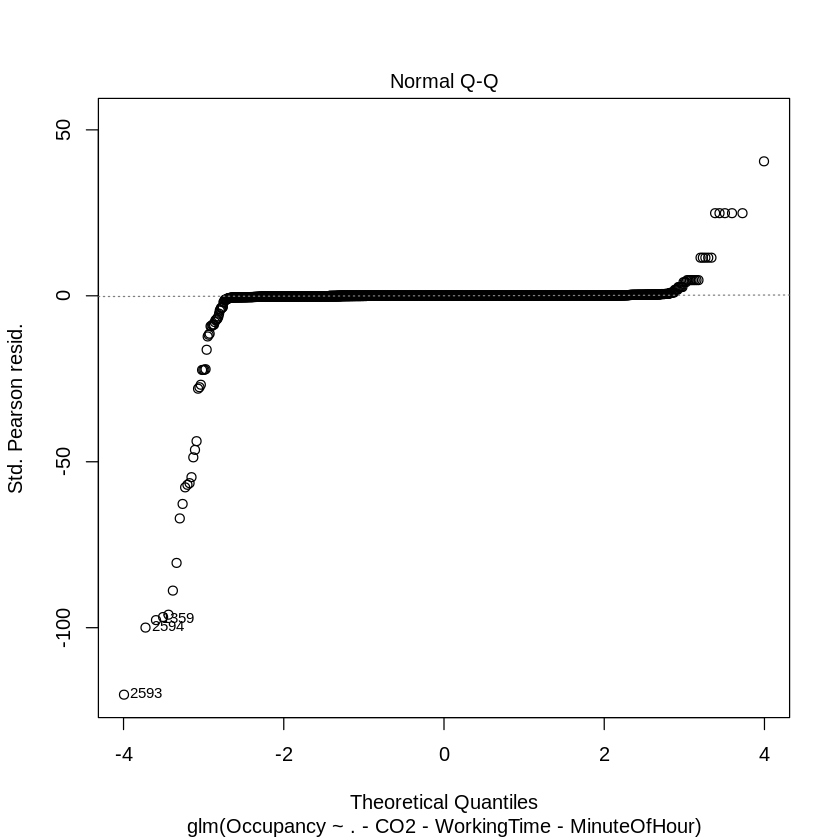

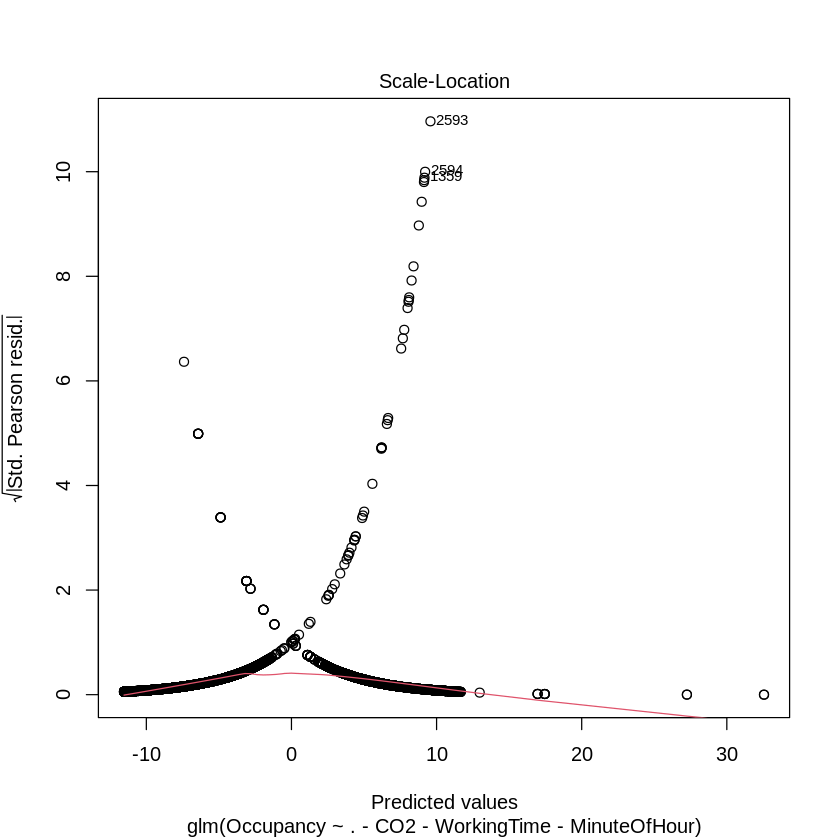

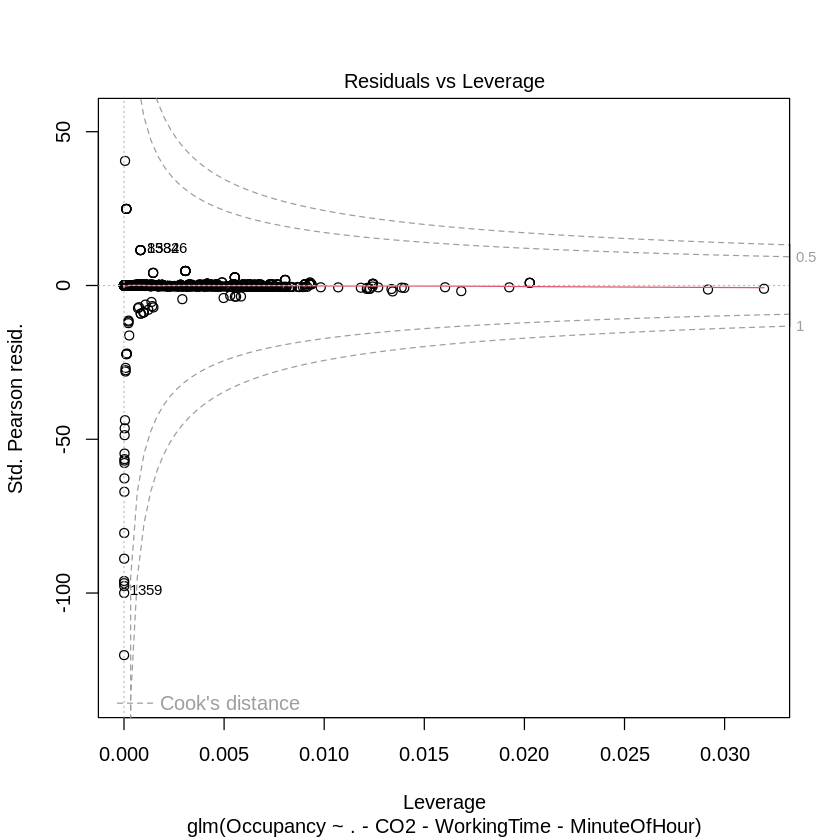

In [17]:
plot(modelo_comp_red)

In [18]:
modelo_inter <- glm(Occupancy ~ 1, data = datos_trans, family = "binomial")
sm <- summary(modelo_inter)
sm


Call:
glm(formula = Occupancy ~ 1, family = "binomial", data = datos_trans)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.177  -1.177   0.000   1.177   1.177  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -1.716e-16  1.611e-02       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21357  on 15405  degrees of freedom
Residual deviance: 21357  on 15405  degrees of freedom
AIC: 21359

Number of Fisher Scoring iterations: 2


In [19]:
anova(modelo_comp_red, modelo_inter, test = "LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15400,1000.748,NA,NA,NA
2,15405,21357.251,-5,-20356.5,0


In [22]:
modelo_comp_red_2 <- glm(Occupancy ~ . - CO2 - WorkingTime - MinuteOfHour - 1, data = datos_trans, family = "binomial")
sm <- summary(modelo_comp_red_2)
sm

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Occupancy ~ . - CO2 - WorkingTime - MinuteOfHour - 
    1, family = "binomial", data = datos_trans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3864  -0.0342  -0.0022   0.0740   3.8579  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
Temperature -0.4123057  0.0345435 -11.936  < 2e-16 ***
Humidity     0.0653121  0.0270582   2.414   0.0158 *  
Light        0.0265514  0.0007267  36.536  < 2e-16 ***
DayOfWeek   -0.8046363  0.0645828 -12.459  < 2e-16 ***
HourOfDay    0.1788001  0.0294389   6.074 1.25e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21357.3  on 15406  degrees of freedom
Residual deviance:  1002.9  on 15401  degrees of freedom
AIC: 1012.9

Number of Fisher Scoring iterations: 9


In [23]:
car::vif(modelo_comp_red_2)

Warning message in vif.default(modelo_comp_red_2):
“No intercept: vifs may not be sensible.”


Temperature    Humidity       Light   DayOfWeek   HourOfDay 
  58.720222   62.138386    7.206911    7.175805   19.340349

In [24]:
anova(modelo_comp_red, modelo_comp_red_2, test = "LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15400,1000.748,NA,NA,NA
2,15401,1002.869,-1,-2.120923,0.1452989


In [ ]:
modelo_simp <- glm(Occupancy ~ . -1 - Temperature - Humidity - MinuteOfHour, data = datos_trans, family = "binomial")
sm <- summary(modelo_simp)
sm

In [ ]:
car::vif(modelo_simp)

In [ ]:
ep <- summary(modelo_simp)$null.deviance - summary(modelo_simp)$deviance
p_value <- 1 - pchisq(ep, df = 6)
p_value

In [ ]:
modelo_simp_red <- glm(Occupancy ~ . - 1 - Temperature - Humidity - WorkingTime, data = datos_trans, family = "binomial")
sm <- summary(modelo_simp_red)
sm

In [ ]:
anova(modelo_simp, modelo_simp_red, test = "LRT")

In [ ]:
plot(modelo_simp)

In [ ]:
modelo_simp_red <- glm(Occupancy ~ -(.) + Temperature, data = datos_trans, family = "binomial")
sm <- summary(modelo_simp_red)
sm

In [ ]:
# Sobredispersión
DHARMa::testDispersion(modelo_comp_red)

simulationOutput <- DHARMa::simulateResiduals(fittedModel = modelo_comp_red, alternative = "greater")
plot(simulationOutput, asFactor = TRUE)



In [ ]:
DHARMa::plotResiduals(simulationOutput, datos$Humidity, quantreg = T)

In [ ]:
range(modelo_comp_red$residuals)

In [ ]:
modelo_simp_probit <- glm(Occupancy ~ . - 1 - Temperature - Humidity, data = datos_trans, family = binomial(link = "probit"))
sm <- summary(modelo_simp_probit)
sm

In [ ]:
plot(modelo_simp_probit)

In [ ]:
car::vif(modelo_simp)

In [ ]:
plot(dates, modelo_comp_red$residuals[1:length(dates)])

## Modelo definitivo

In [85]:
modelo_comp_red <- glm(Occupancy ~ . - CO2 - WorkingTime - MinuteOfHour, data = datos_trans, family = "binomial")
sm <- summary(modelo_comp_red)
sm

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Occupancy ~ . - CO2 - WorkingTime - MinuteOfHour, 
    family = "binomial", data = datos_trans)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.3768  -0.0340  -0.0022   0.0686   3.8481  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.0713498  2.7504148  -1.480  0.13880    
Temperature -0.2614219  0.1072073  -2.438  0.01475 *  
Humidity     0.1010733  0.0362096   2.791  0.00525 ** 
Light        0.0264527  0.0007318  36.149  < 2e-16 ***
DayOfWeek   -0.8310600  0.0679529 -12.230  < 2e-16 ***
HourOfDay    0.1708129  0.0303633   5.626 1.85e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 21357.3  on 15405  degrees of freedom
Residual deviance:  1000.7  on 15400  degrees of freedom
AIC: 1012.7

Number of Fisher Scoring iterations: 9


In [86]:
confint(modelo_comp_red)

Waiting for profiling to be done...

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted proba

,2.5 %,97.5 %
(Intercept),-9.36197011,1.44145347
Temperature,-0.47687054,-0.05588939
Humidity,0.02956018,0.17173210
Light,0.02507926,0.02795197
DayOfWeek,-0.96963420,-0.70259487
HourOfDay,0.11233304,0.23133912


In [109]:
library(readr)
datos_prueba <- read_csv("Archivos/datos_prueba.csv",
                  show_col_types = FALSE)

datos_prueba$date <- lubridate::round_date(datos_prueba$date,
           unit = "minute")

datos_prueba$id <- NULL


In [110]:
datos_prueba$date <- lubridate::round_date(datos_prueba$date,
                                    unit = "minute")

datos_prueba$DayOfWeek <- lubridate::wday(datos_prueba$date, week_start=1)
datos_prueba$WorkingTime <- as.numeric(lubridate::wday(datos_prueba$date, week_start=1) <= 5
                               & lubridate::hour(datos_prueba$date) >= 8
                               & lubridate::hour(datos_prueba$date) <= 18)


datos_prueba$HourOfDay <- lubridate::hour(datos_prueba$date)
datos_prueba$MinuteOfHour <- lubridate::minute(datos_prueba$date)

datos_prueba <- datos_prueba[, c("Temperature", "Humidity", "Light", "DayOfWeek", "HourOfDay", "Occupancy")]

head(datos_prueba)

Temperature,Humidity,Light,DayOfWeek,HourOfDay,Occupancy
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
23.18,27.2720,426.0,3,17,1
23.15,27.2675,429.5,3,17,1
23.15,27.2450,426.0,3,17,1
23.15,27.2000,426.0,3,17,1
23.10,27.2000,426.0,3,17,1
23.10,27.2000,419.0,3,17,1


In [80]:
datos_prueba <- datos_prueba[1:4, ]

In [81]:
head(datos)

Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,DayOfWeek,WorkingTime,HourOfDay,MinuteOfHour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
21.7600,31.13333,437.3333,1029.667,0.005021011,1,3,1,14,48
21.7900,31.00000,437.3333,1000.000,0.005008581,1,3,1,14,49
21.7675,31.12250,434.0000,1003.750,0.005021569,1,3,1,14,50
21.7675,31.12250,439.0000,1009.500,0.005021569,1,3,1,14,51
21.7900,31.13333,437.3333,1005.667,0.005030298,1,3,1,14,52
21.7600,31.26000,437.3333,1014.333,0.005041605,1,3,1,14,53


In [82]:
dim(datos)

[1] 15406    10

In [84]:
x <- as.matrix(cbind(1, datos[, -c(4, 5, 6, 8, 10)]))

a <- as.matrix(cbind(1, datos_prueba[, -6]))

c <- as.matrix(datos_prueba[, "Occupancy"], ncol = 1)

beta <- as.matrix(modelo_comp_red$coefficients, ncol = 1)

var_beta <- solve(t(x)
                  %*% (diag(modelo_comp_red$fitted.values
                            * (1 - modelo_comp_red$fitted.values)))
                  %*% x)

ep <- t((a %*% beta) - c) %*% solve(a %*% var_beta %*% t(a)) %*% ((a %*% beta) - c)


p_value <- 1 - pchisq(ep, df = nrow(a))
p_value


,Occupancy
Occupancy,0


In [89]:
head(datos_prueba)

Temperature,Humidity,Light,DayOfWeek,HourOfDay,Occupancy
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
23.18,27.2720,426.0,3,17,1
23.15,27.2675,429.5,3,17,1
23.15,27.2450,426.0,3,17,1
23.15,27.2000,426.0,3,17,1
23.10,27.2000,426.0,3,17,1
23.10,27.2000,419.0,3,17,1


In [95]:
head(new_datos)

Temperature,Humidity,Light,DayOfWeek,HourOfDay,Occupancy
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>


In [100]:


new_datos <- datos_prueba[FALSE, ]

new_datos$HourOfDay <- as.double(new_datos$HourOfDay)

minutes_to_group <- 30

for(upper in minutes_to_group * (1:(nrow(datos_prueba) / minutes_to_group))) {
    #print(paste(upper, upper - (minutes_to_group - 1)))
    #print(data.frame(as.list(colMeans(datos_prueba[(upper - (minutes_to_group - 1)):upper, ]))))
    new_datos[nrow(new_datos) + 1, ] <- data.frame(as.list(colMeans(datos_prueba[(upper - (minutes_to_group - 1)):upper, ])))
}

# new_datos <- new_datos[new_datos$WorkingTime != 0, ]

datos_prueba <- new_datos

In [101]:
dim(datos_prueba)

[1] 271   6

In [106]:
x <- as.matrix(cbind(1, datos[, -c(4, 5, 6, 8, 10)]))

beta <- as.matrix(modelo_comp_red$coefficients, ncol = 1)

var_beta <- solve(t(x)
                      %*% (diag(modelo_comp_red$fitted.values
                                * (1 - modelo_comp_red$fitted.values)))
                      %*% x)

rejected <- 0

not_rejected <- 0

for(restric in 1:nrow(datos_prueba)){

    a <- as.matrix(cbind(1, datos_prueba[restric, -6]))

    c <- as.matrix(datos_prueba[restric, "Occupancy"], ncol = 1)

    ep <- t((a %*% beta) - c) %*% solve(a %*% var_beta %*% t(a)) %*% ((a %*% beta) - c)

    p_value <- 1 - pchisq(ep, df = nrow(a))
    
    if(p_value <= 0.1){
        rejected <- rejected + 1
    } else {
        not_rejected <- not_rejected + 1
    }
    
}




In [107]:
rejected
not_rejected

[1] 268

[1] 3

Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictor, auc = TRUE, ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



Area under the curve: 0.9925

Setting levels: control = 0, case = 1

Warning message in roc.default(x, predictor, plot = TRUE, ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



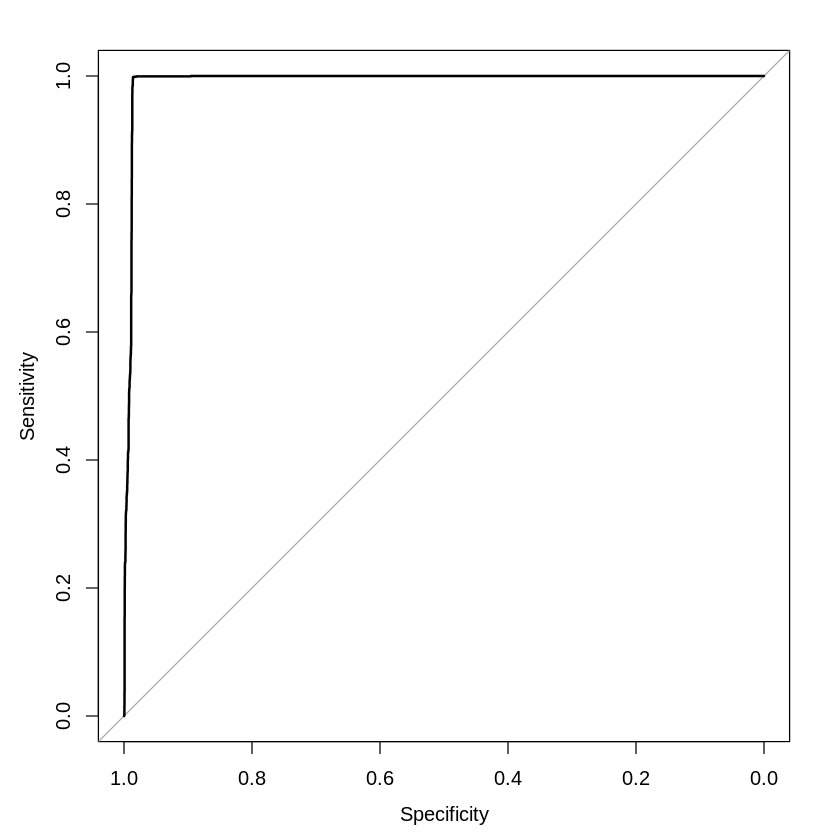

In [117]:
a <- as.matrix(cbind(1, datos_prueba[, -6]))
x <- as.matrix(cbind(1, datos[, -c(4, 5, 6, 8, 10)]))


predicted_test <- exp(a %*% beta) / (1 + exp(a %*% beta))
predicted_train <- x %*% beta

pROC::auc(datos_prueba$Occupancy, predicted_test)

pROC::plot.roc(datos_prueba$Occupancy, predicted_test)

In [123]:
1 - sum(abs(datos_prueba$Occupancy - predicted_test) > 0.5) / nrow(datos_prueba)

[1] 0.9885791

## Estimación por agrupación

In [ ]:
datos <- readr::read_csv("Archivos/datos_entrenamiento.csv",
                  show_col_types = FALSE)

datos$id <- NULL

datos$date <- lubridate::round_date(datos$date,
                                    unit = "minute")

datos$DayOfWeek <- lubridate::wday(datos$date, week_start=1)
datos$WorkingTime <- as.numeric(lubridate::wday(datos$date, week_start=1) <= 5
                               & lubridate::hour(datos$date) >= 8
                               & lubridate::hour(datos$date) <= 18)
datos$HourOfDay <- as.double(lubridate::hour(datos$date))

head(datos)

In [ ]:
range(datos$date)


In [ ]:
new_datos <- datos[FALSE, -1]

minutes_to_group <- 15

for(upper in minutes_to_group * (1:(nrow(datos) / minutes_to_group))) {
    new_datos[nrow(new_datos) + 1, ] <- data.frame(as.list(colMeans(datos[(upper - (minutes_to_group - 1)):upper, -1])))
}

new_datos <- new_datos[new_datos$WorkingTime != 0, ]

datos <- new_datos

head(new_datos)
dim(new_datos)

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 18)

panel.hist <- function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}

pairs(new_datos, diag.panel=panel.hist)

In [ ]:
summary(modelo_comp_red)

In [ ]:
boxplot(datos$DayOfWeek ~ datos$Occupancy,
        ylab = "Día de la semana",
        xlab = "Ocupación",
        col = "#E79C82")

In [ ]:
plot(datos$DayOfWeek,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Día de la semana",
     col = "#E79C82")

In [ ]:
boxplot(datos$HourOfDay ~ datos$Occupancy,
        ylab = "Hora del día",
        xlab = "Ocupación",
        col = "#E79C82")

In [ ]:
plot(datos$WorkingTime,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Horario laboral",
     col = "#E79C82")

In [ ]:
head(datos)

In [ ]:
boxplot(datos$HumidityRatio ~ datos$WorkingTime + datos$Occupancy,
        xlab = "Ocupación",
        col = rainbow(2, s = 0.5))

In [ ]:
hist(datos$DayOfWeek)

In [ ]:
hist(datos$Temperature,
     main = "Histograma de temperaturas",
     xlab = "Temperatura",
     col = "#D86036")

In [ ]:
boxplot(datos$Temperature ~ datos$Occupancy,
        ylab = "Temperatura",
        xlab = "Ocupación",
        col = "#D86036")

In [ ]:
plot(datos$Temperature,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Temperatura",
     col = "#D86036")

In [ ]:
hist(datos$Humidity,
     main = "Histograma de humedad",
     xlab = "Humedad",
     col = "#CF2D4C")

In [ ]:
boxplot(datos$Humidity ~ datos$Occupancy,
        ylab = "Humedad",
        xlab = "Ocupación",
        col = "#CF2D4C")

In [ ]:
plot(datos$Humidity,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Humedad",
     col = "#CF2D4C")

In [ ]:
hist(datos$Light,
     main = "Histograma de intensidad de luz",
     xlab = "Intensidad de luz",
     col = "#B04C7A")

In [ ]:
boxplot(datos$Light ~ datos$Occupancy,
        ylab = "Intensidad de luz",
        xlab = "Ocupación",
        col = "#B04C7A")

In [ ]:
plot(datos$Light,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Intensidad de luz",
     col = "#B04C7A")

In [ ]:
hist(datos$CO2,
     main = "Histograma de concentración de CO2",
     xlab = "Concentración de CO2",
     col = "#623A6C")

In [ ]:
boxplot(datos$CO2 ~ datos$Occupancy,
        ylab = "CO2",
        xlab = "Concentración de CO2",
        col = "#623A6C")

In [ ]:
plot(datos$CO2,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Concentración de CO2",
     col = "#623A6C")

In [ ]:
hist(datos$HumidityRatio,
     main = "Histograma de tasa de humedad.",
     xlab = "Tasa de humedad",
     col = "#545E66")

In [ ]:
boxplot(datos$HumidityRatio ~ datos$Occupancy,
        ylab = "Tasa de humedad",
        xlab = "Tasa de humedad",
        col = "#545E66")

In [ ]:
plot(datos$HumidityRatio,
     datos$Occupancy,
     ylab = "Ocupación",
     xlab = "Tasa de humedad",
     col = "#545E66")

In [ ]:
datos_trans <- as.data.frame(model.matrix(Occupancy ~ . - HumidityRatio - WorkingTime - 1,
                                          data = datos))

#+ (HourOfDay) * (Temperature + Humidity)
#+ (DayOfWeek) * (Temperature)
#+ (WorkingTime) * (Temperature + Humidity + Light + CO2)

datos_trans$Occupancy <- datos$Occupancy
head(datos_trans)

In [ ]:
modelo_comp <- glm(Occupancy ~ . - 1 - HourOfDay, data = datos_trans, family = "binomial")
sm <- summary(modelo_comp)
sm

In [ ]:
car::vif(modelo_comp)

In [ ]:
simulationOutput <- DHARMa::simulateResiduals(fittedModel = fittedModel)